In [44]:
from PIL import Image
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

def image_to_binary_grid(image_path, size=(64, 64), threshold=0.5):
    img = Image.open(image_path).convert('L')
    
    img = img.resize(size)
    
    img_array = np.array(img) / 255.0
    
    binary_grid = np.where(img_array > threshold, 1, 0)
    
    return binary_grid

def save_grid_to_csv(binary_grid, output_path):
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(binary_grid)

def display_binary_grid(binary_grid):
    plt.figure(figsize=(6, 6))
    
    plt.imshow(binary_grid, cmap='gray', interpolation='nearest')
    
    plt.axis('off')
    
    plt.show()

def process_images(image_folder, output_folder, csv_list_file, size=(64, 64), threshold=0.5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    with open(csv_list_file, 'w') as list_file:
        for image_name in os.listdir(image_folder):
            if image_name.endswith(".png"):
                image_path = os.path.join(image_folder, image_name)
                output_csv = os.path.join(output_folder, f"{os.path.splitext(image_name)[0]}.csv")
                
                binary_grid = image_to_binary_grid(image_path, size=size, threshold=threshold)
                
                save_grid_to_csv(binary_grid, output_csv)
                
                list_file.write(f"{os.path.basename(output_csv)}\n")                
                
                print(f"Displaying {image_name}")
                display_binary_grid(binary_grid)

Displaying 00001.png


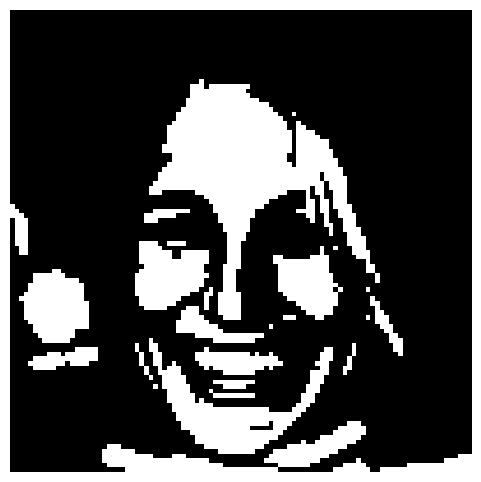

Displaying 00002.png


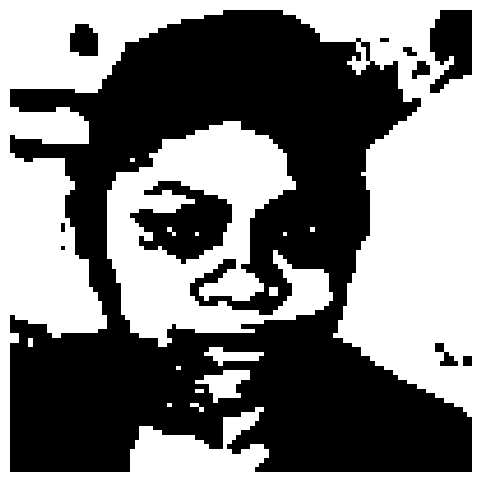

Displaying 00003.png


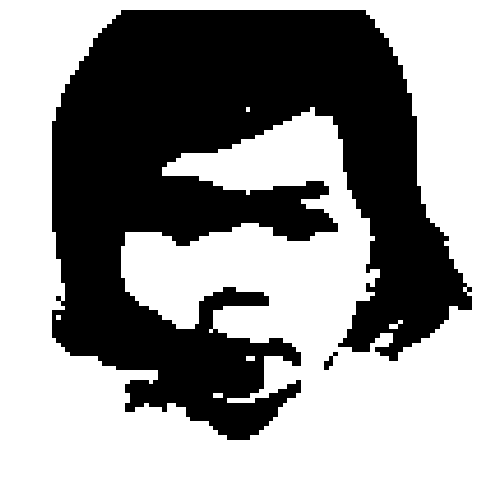

Displaying 00004.png


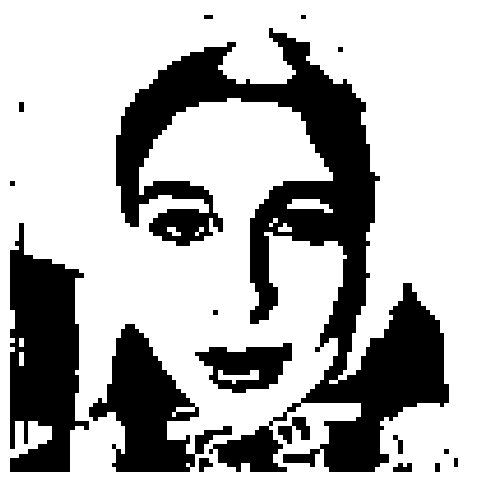

Displaying 00005.png


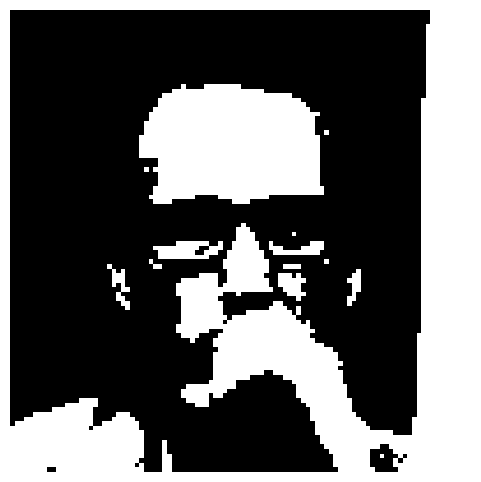

Displaying 00007.png


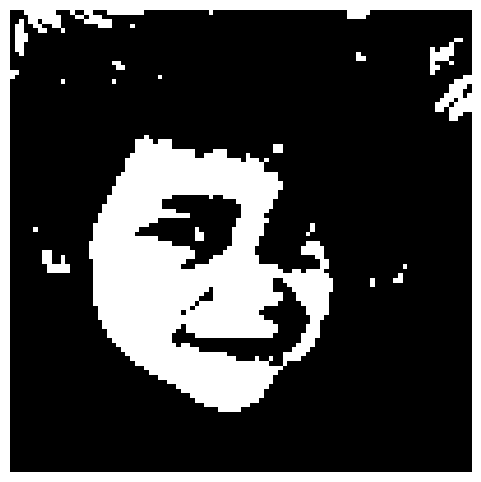

Displaying 00008.png


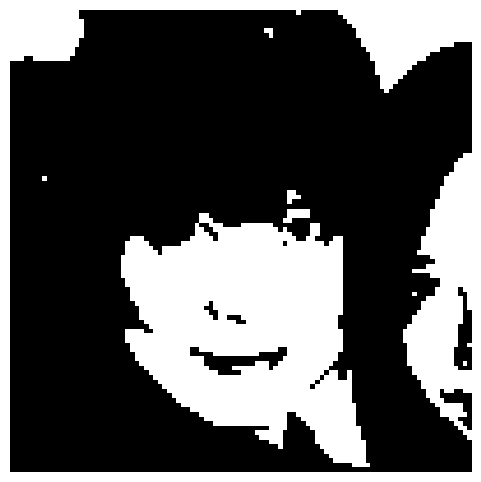

Displaying 00009.png


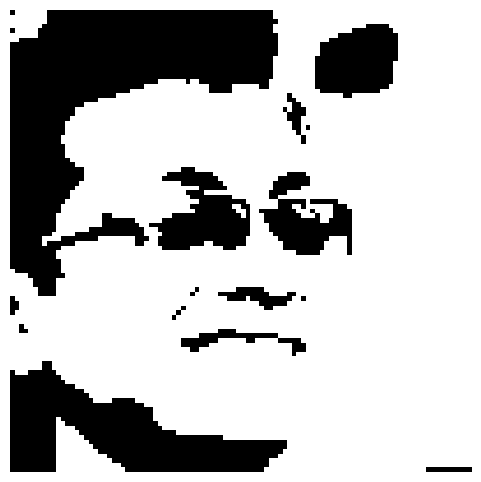

Displaying 00010.png


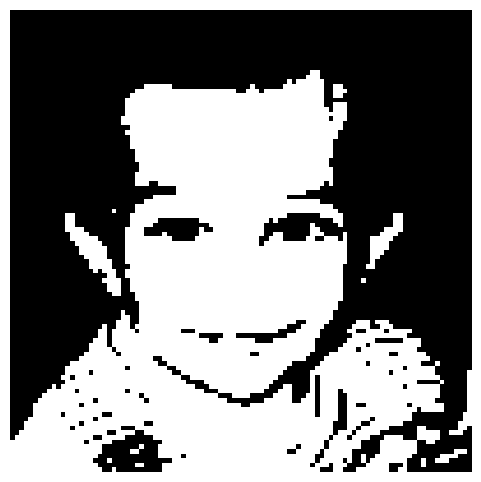

Displaying 00012.png


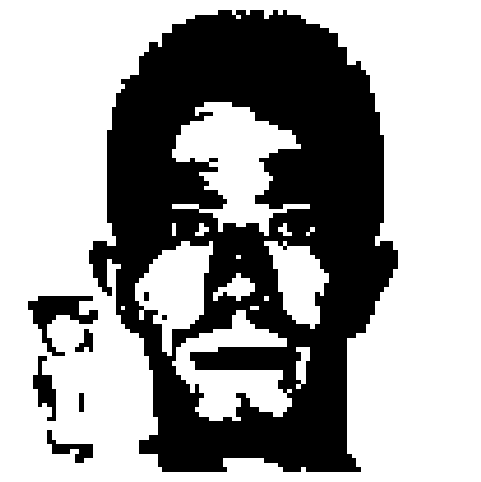

Displaying 00014.png


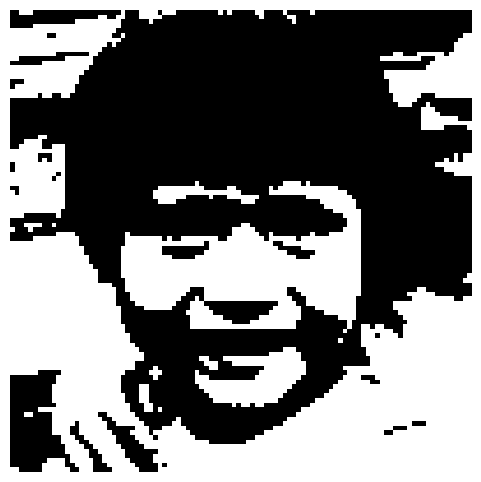

Displaying 00015.png


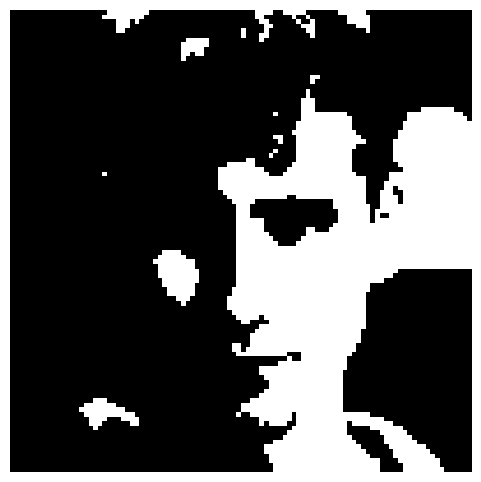

Displaying 00016.png


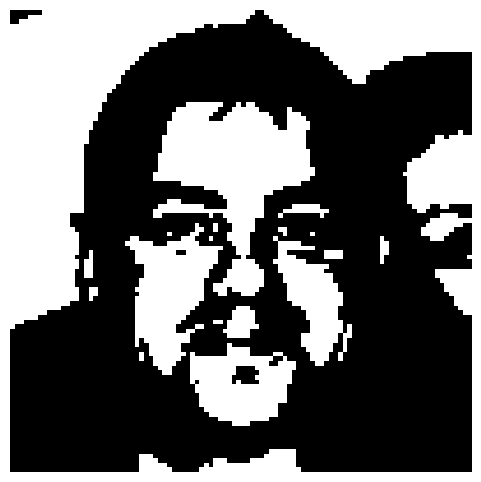

Displaying 00018.png


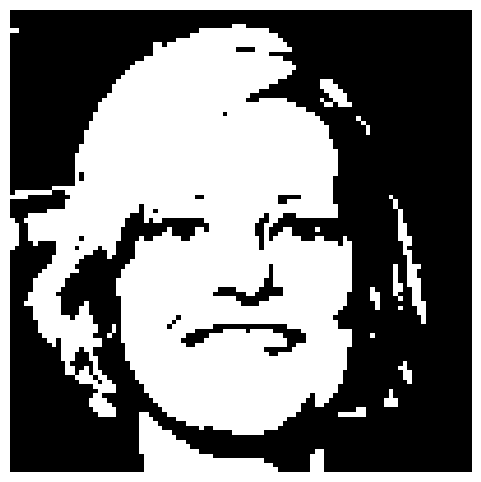

Displaying 00019.png


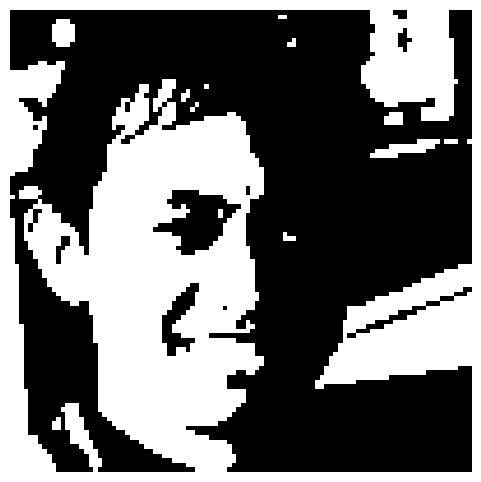

Displaying 00020.png


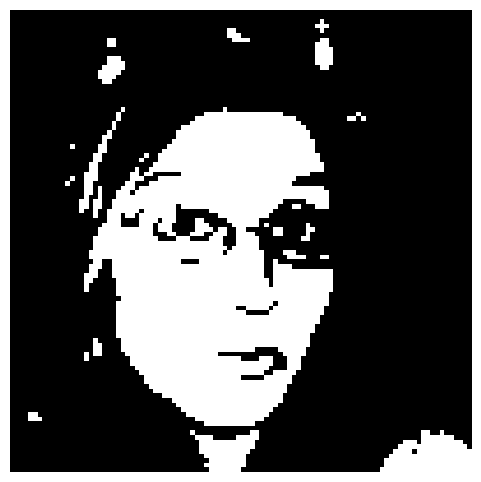

Displaying 00022.png


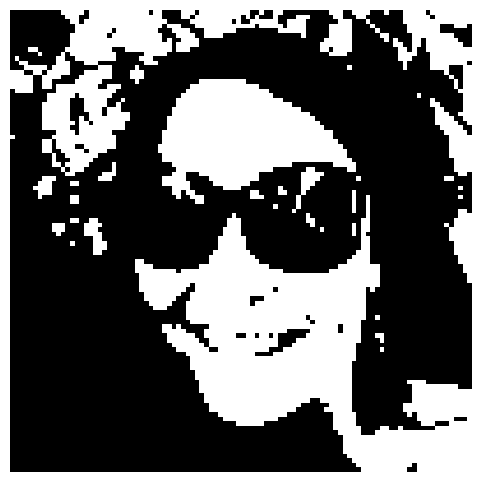

Displaying 00023.png


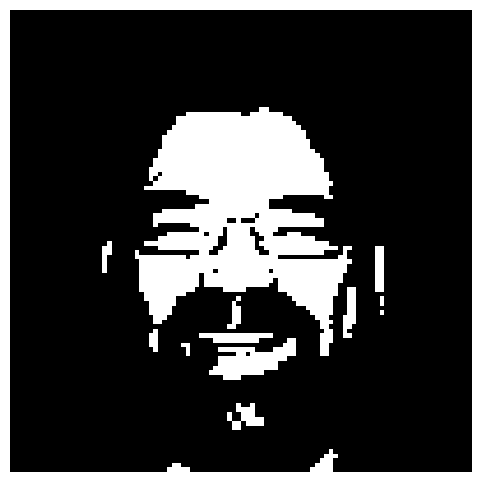

Displaying 00024.png


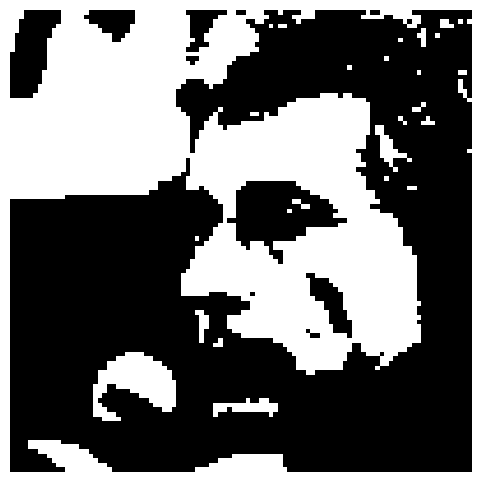

Displaying 00027.png


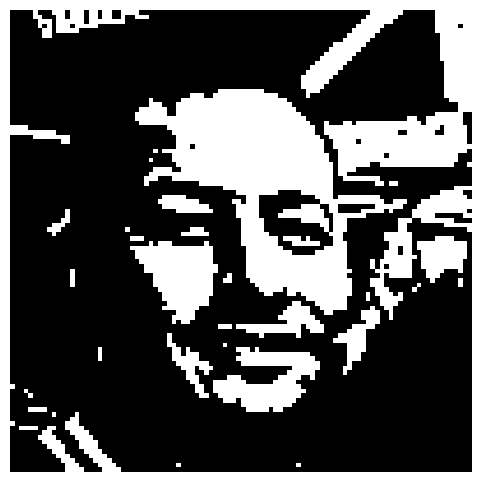

Displaying 00028.png


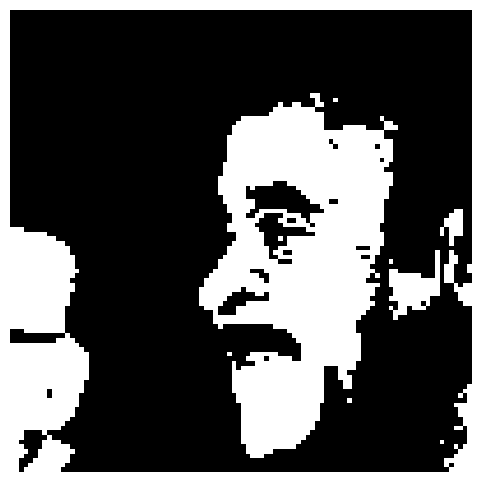

Displaying 00030.png


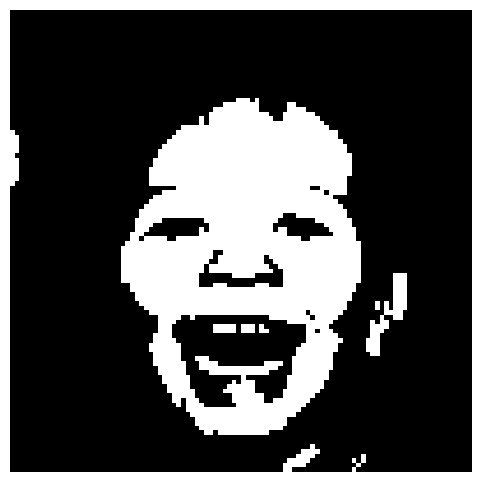

Displaying 00031.png


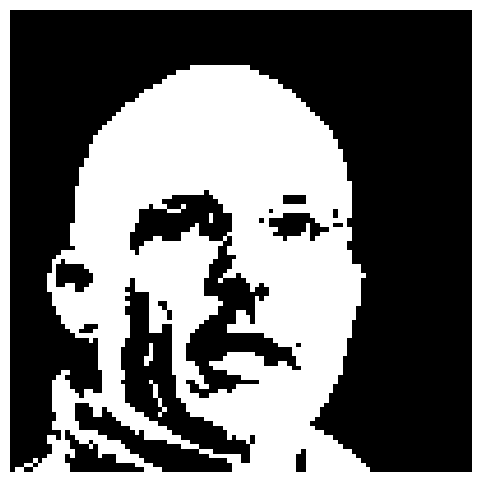

Displaying 00035.png


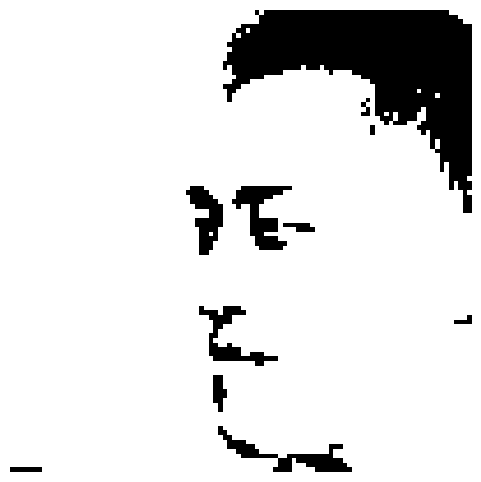

Displaying 00036.png


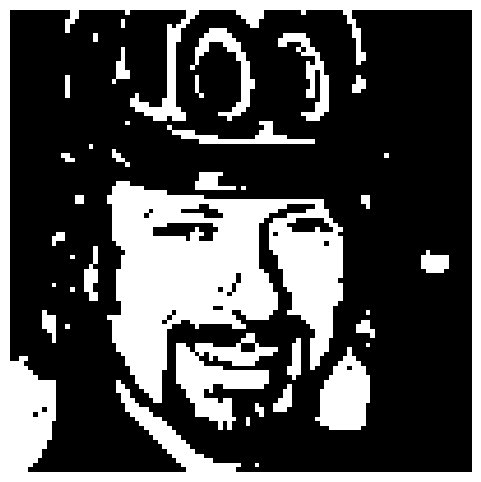

Displaying 00037.png


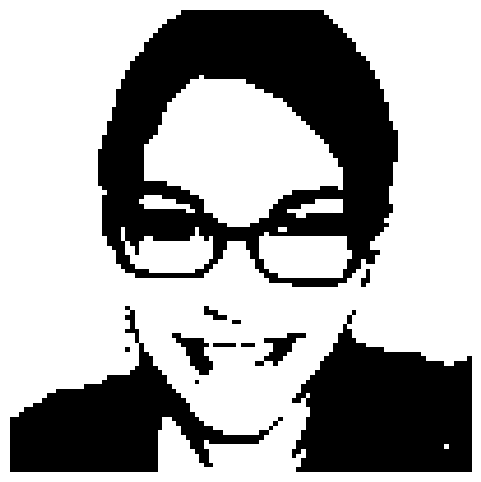

Displaying 00039.png


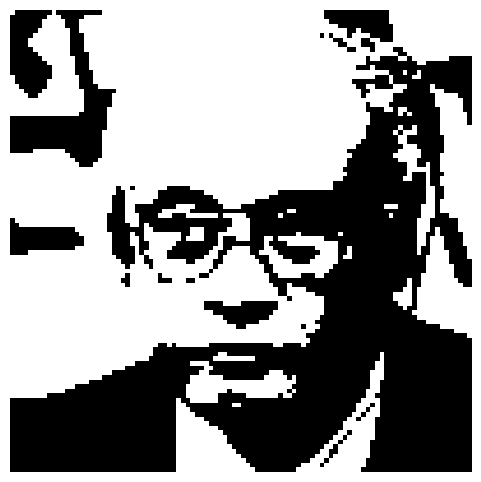

Displaying 00040.png


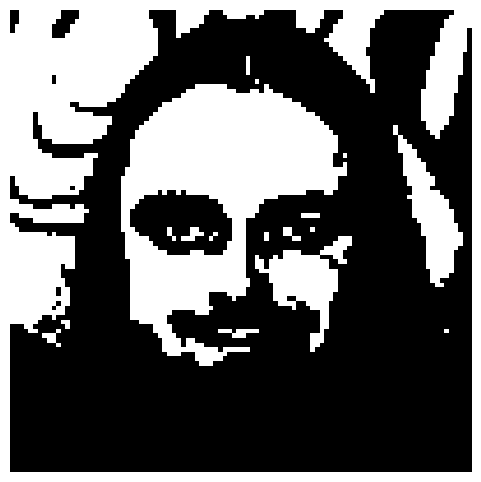

Displaying 00041.png


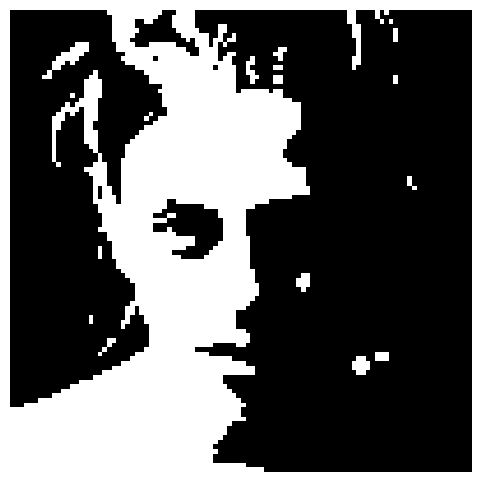

Displaying 00042.png


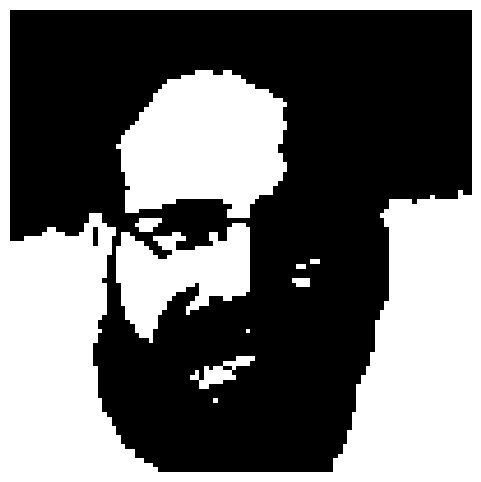

Displaying 00043.png


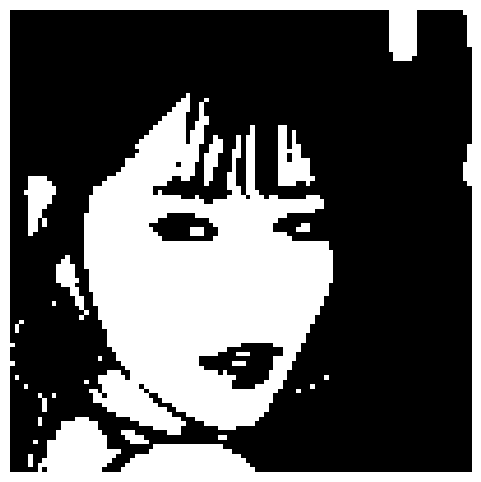

Displaying 00044.png


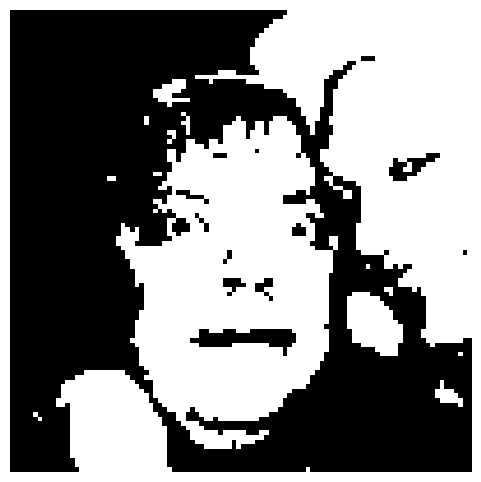

Displaying 00045.png


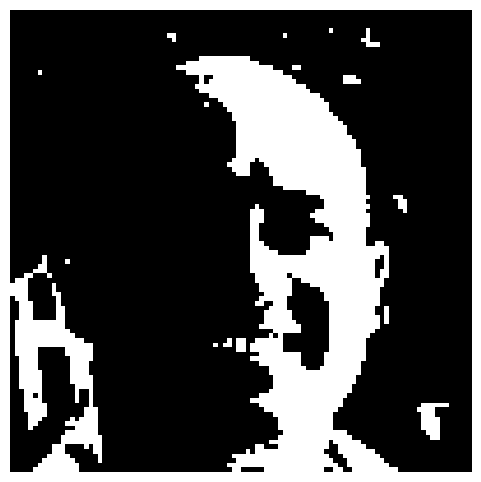

Displaying 00047.png


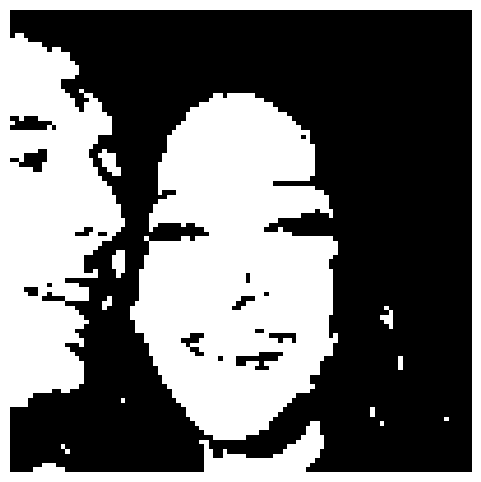

Displaying 00048.png


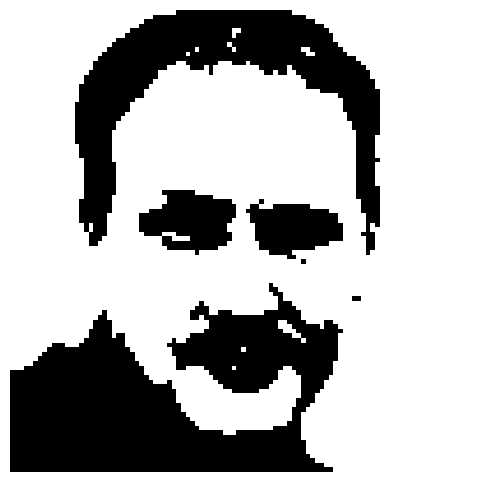

Displaying 00049.png


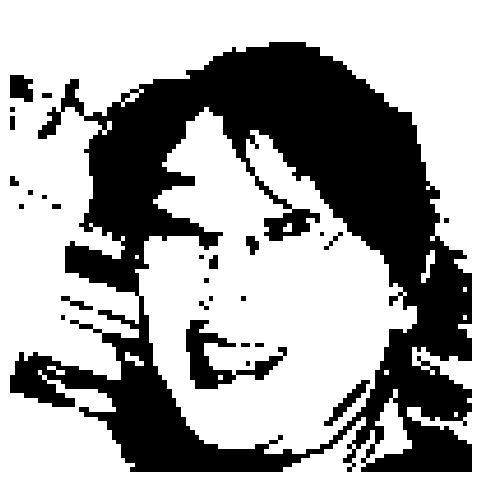

Displaying 00051.png


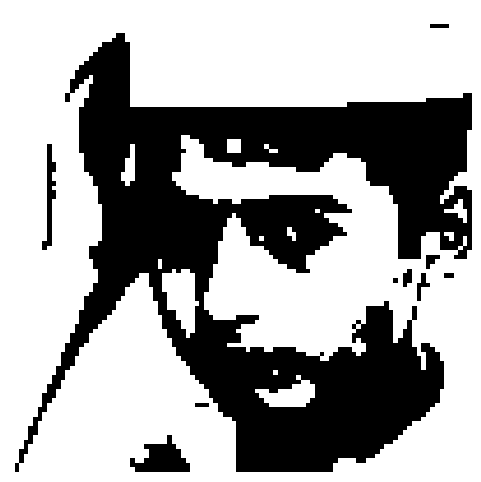

Displaying 00052.png


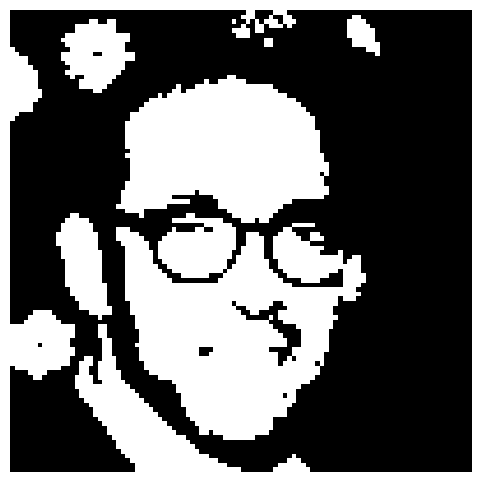

Displaying 00053.png


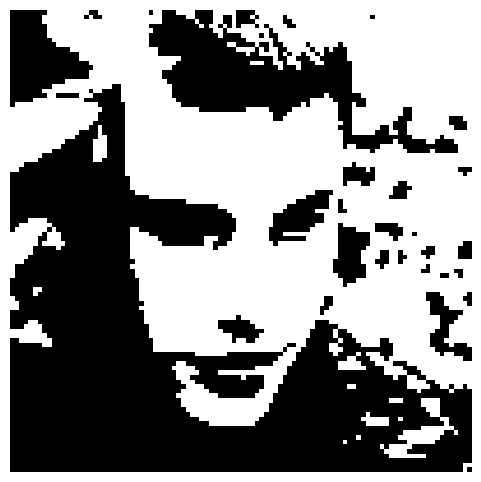

Displaying 00055.png


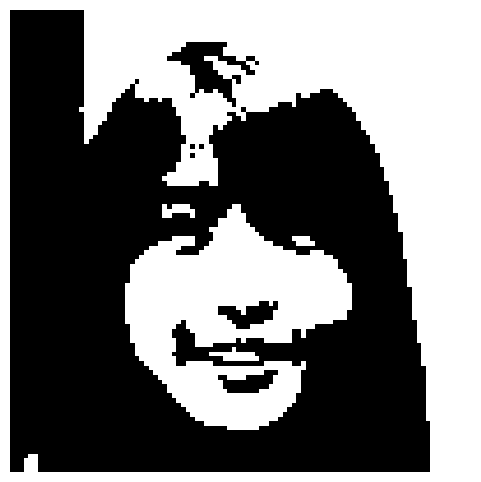

Displaying 00056.png


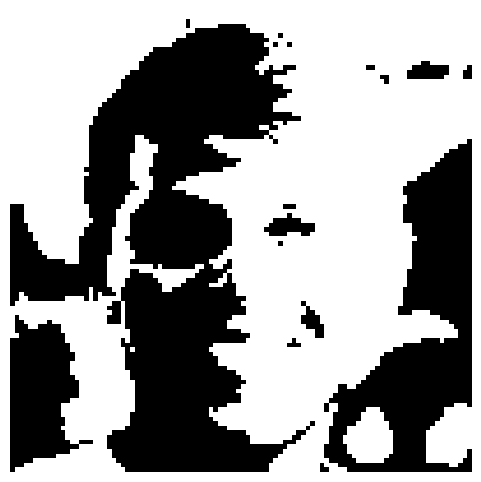

Displaying 00057.png


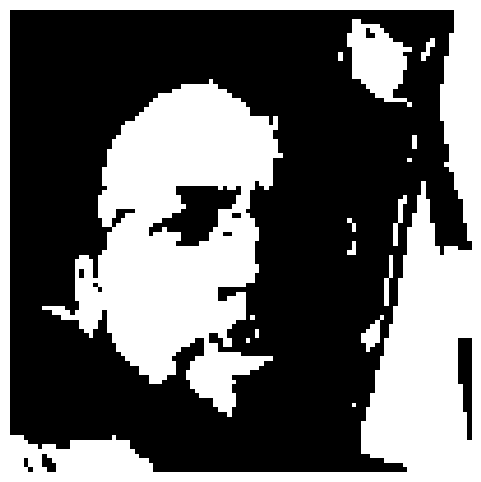

Displaying 00058.png


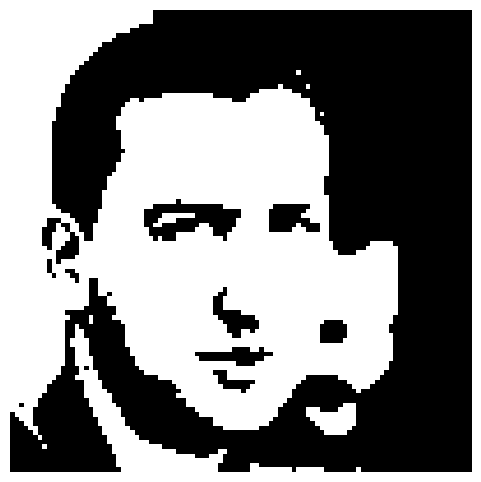

Displaying 00059.png


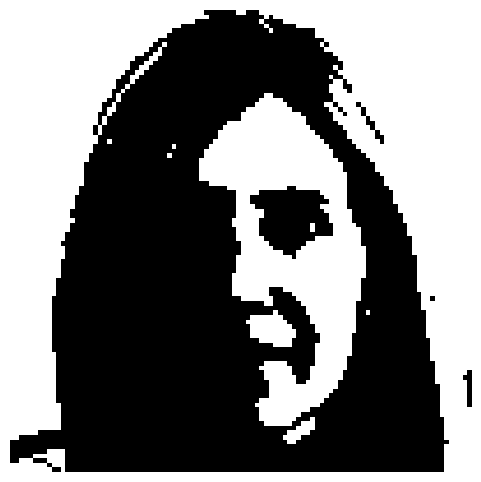

Displaying 00060.png


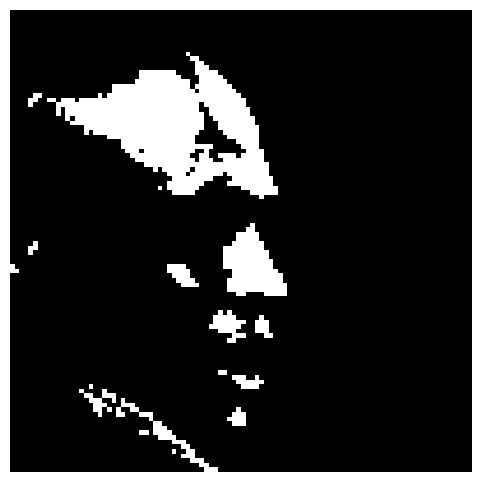

Displaying 00061.png


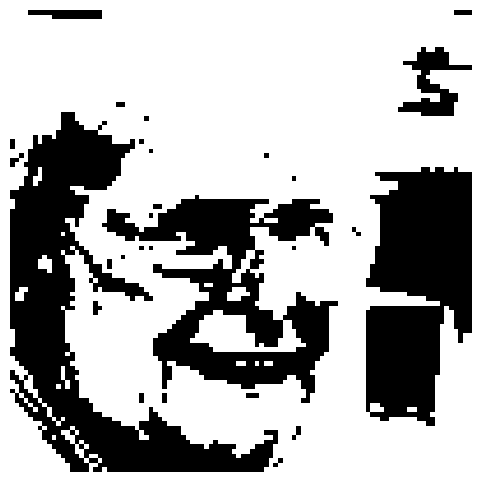

Displaying 00062.png


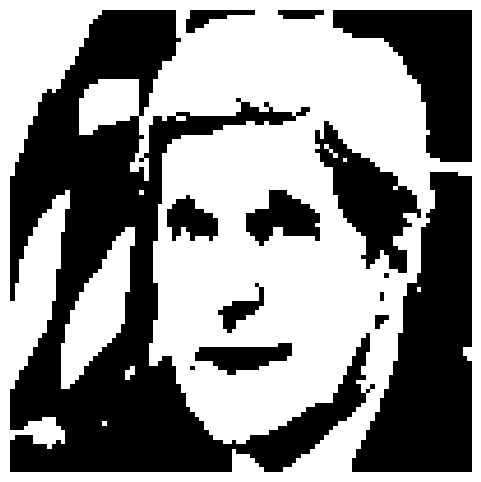

Displaying 00063.png


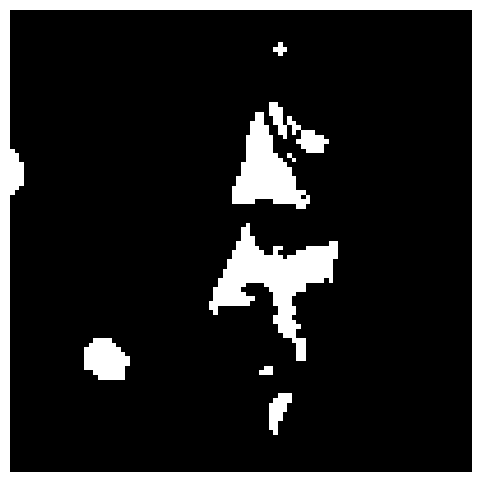

Displaying 00064.png


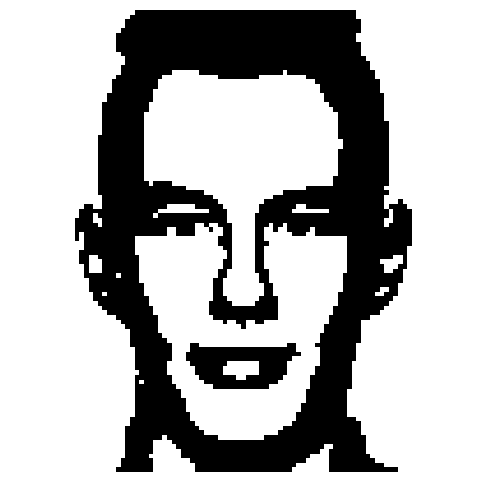

Displaying 00065.png


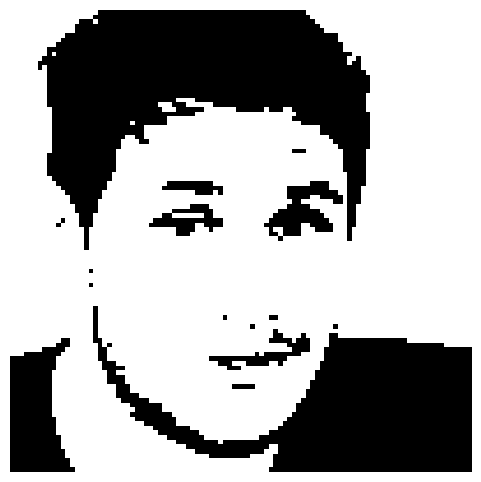

Displaying 00066.png


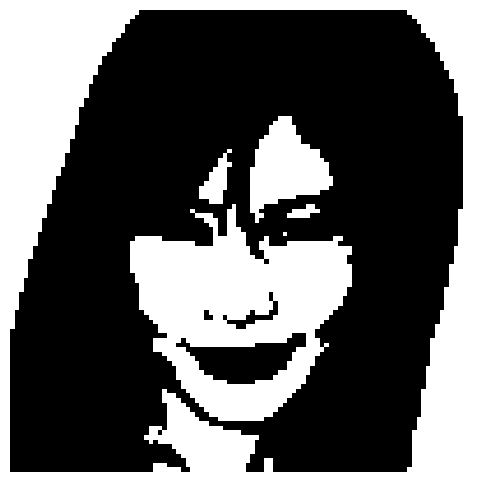

Displaying 00067.png


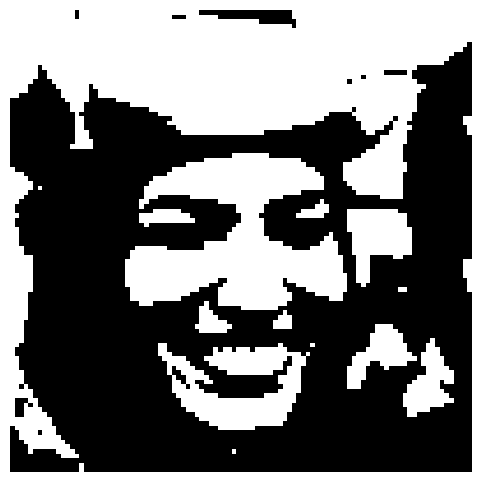

Displaying 00068.png


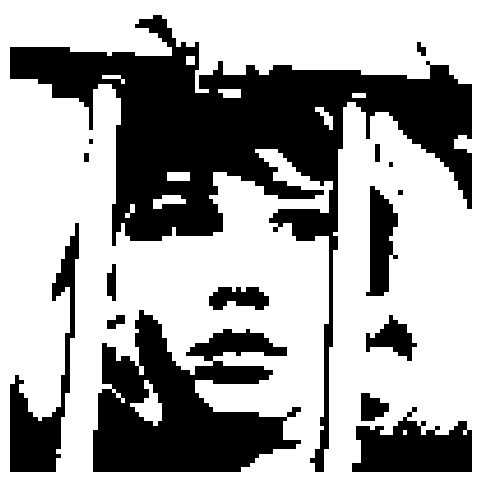

Displaying 00069.png


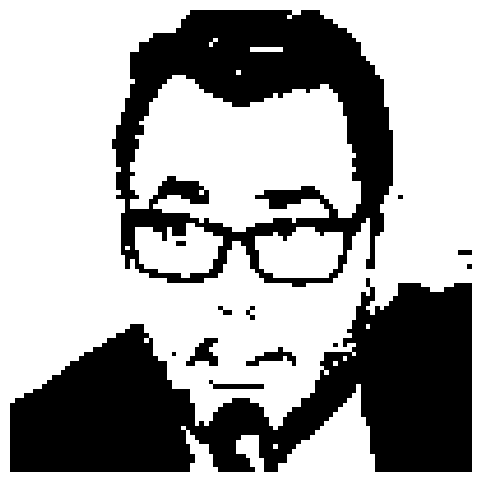

Displaying 00070.png


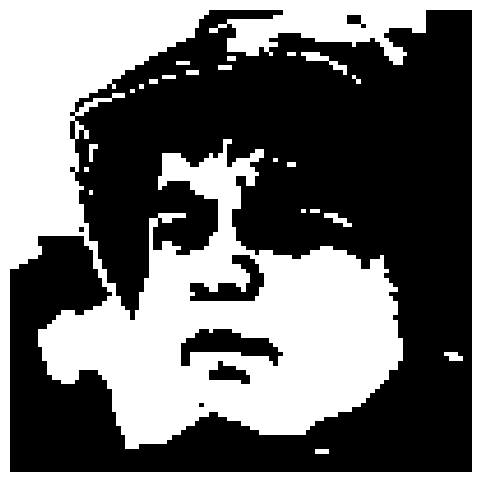

Displaying 00072.png


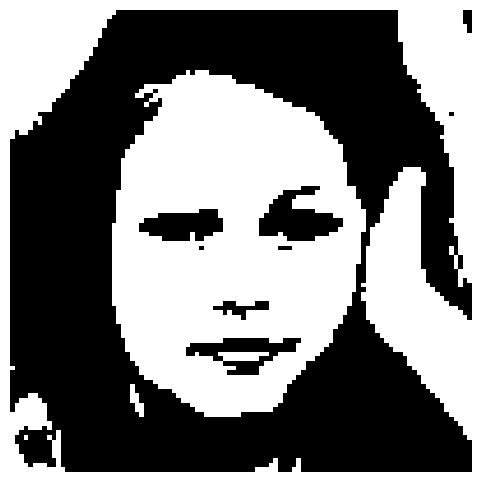

Displaying 00074.png


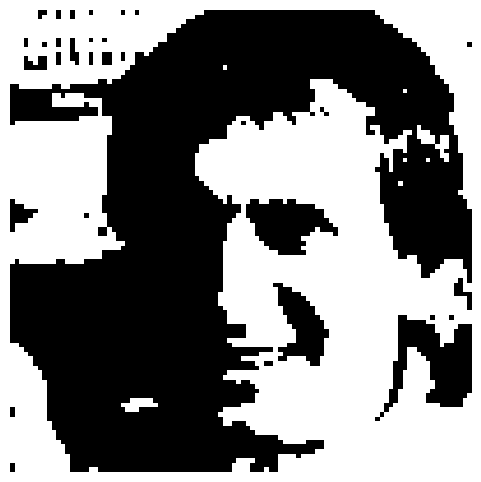

Displaying 00075.png


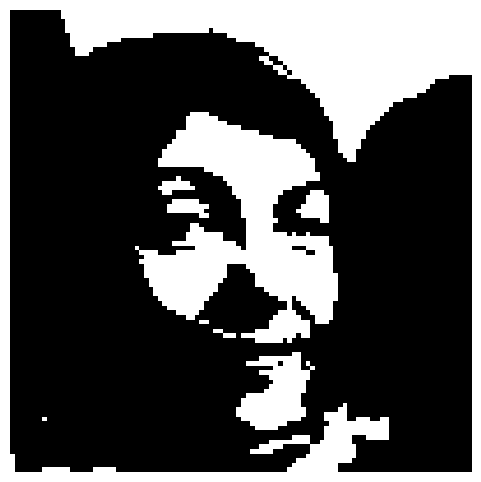

Displaying 00076.png


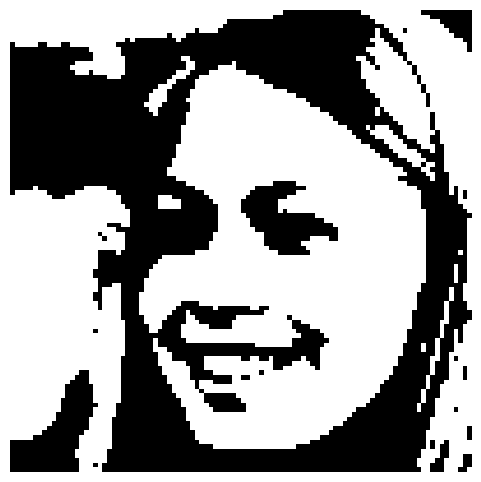

Displaying 00077.png


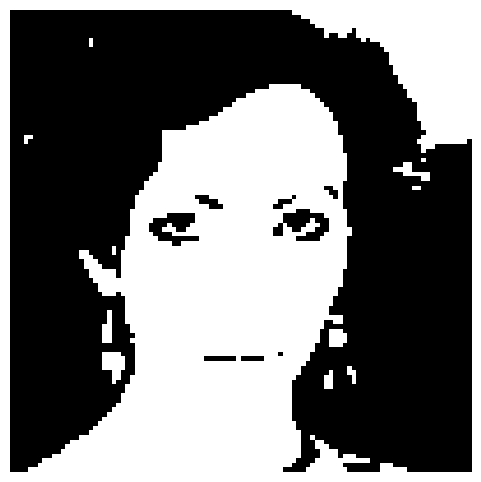

Displaying 00078.png


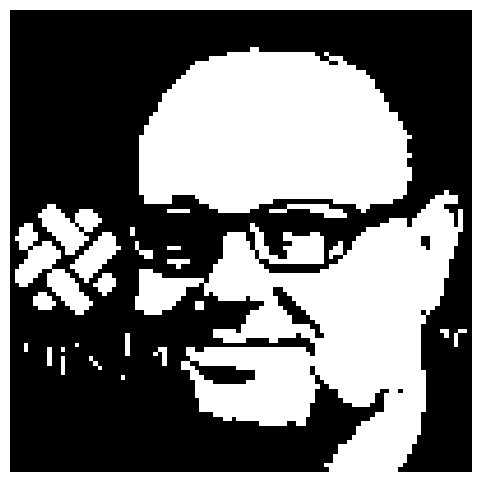

Displaying 00079.png


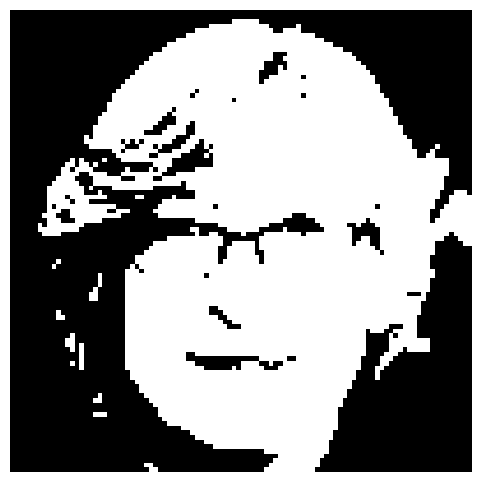

Displaying 00080.png


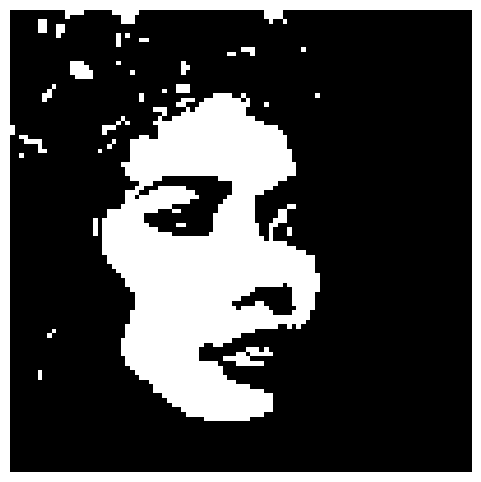

Displaying 00081.png


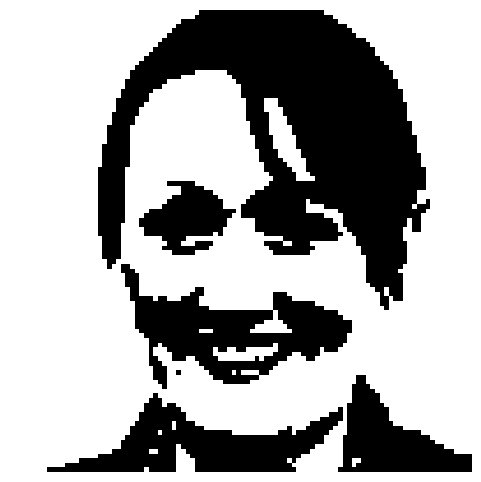

Displaying 00082.png


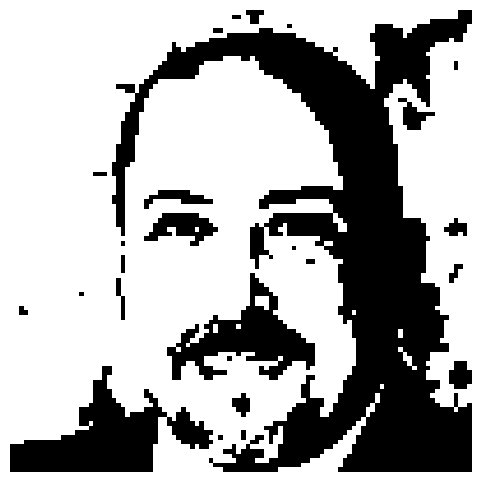

Displaying 00083.png


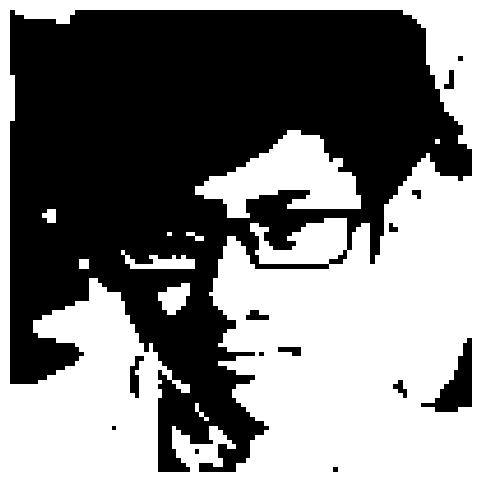

Displaying 00084.png


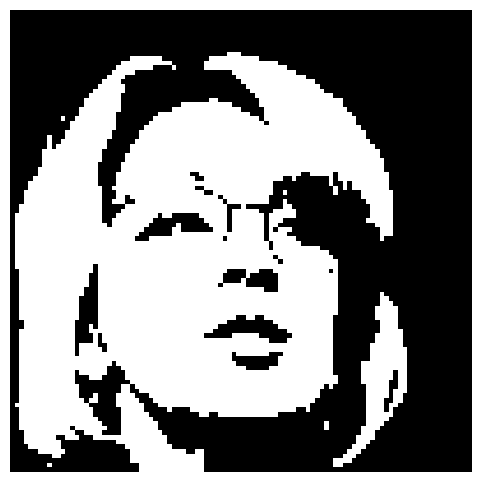

Displaying 00085.png


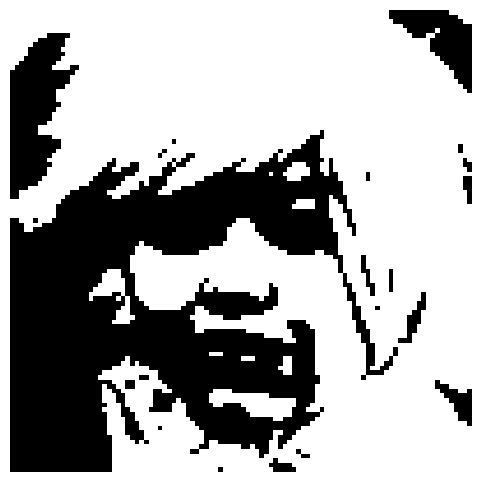

Displaying 00086.png


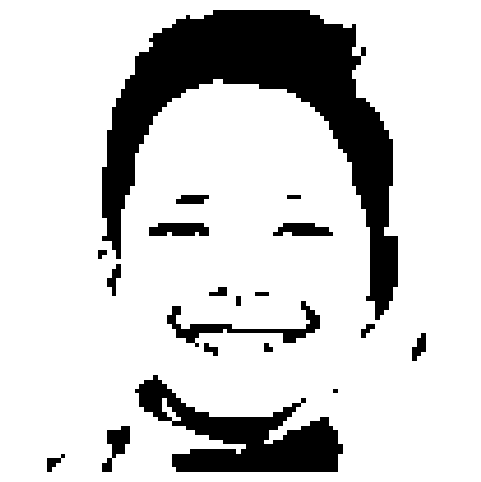

Displaying 00087.png


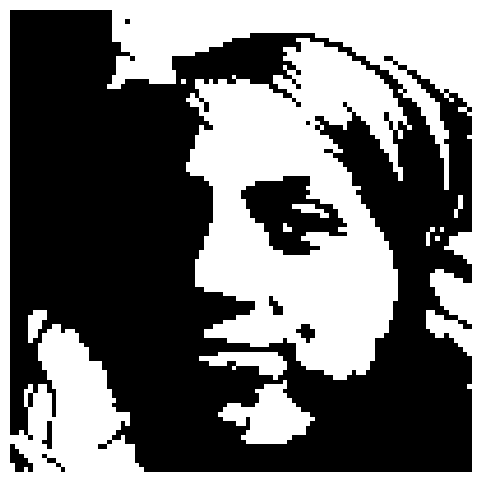

Displaying 00088.png


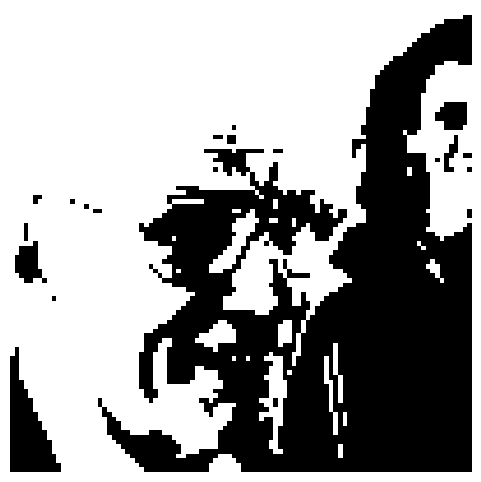

Displaying 00089.png


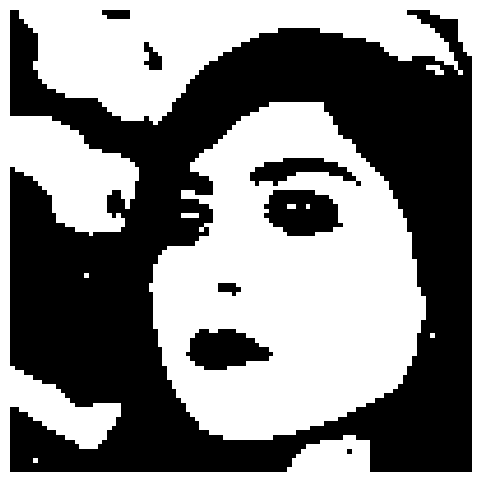

Displaying 00090.png


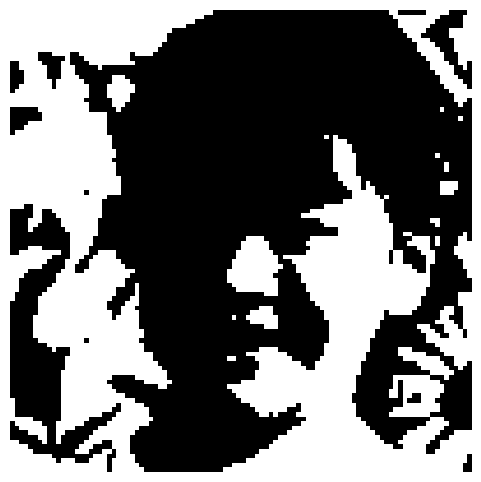

Displaying 00092.png


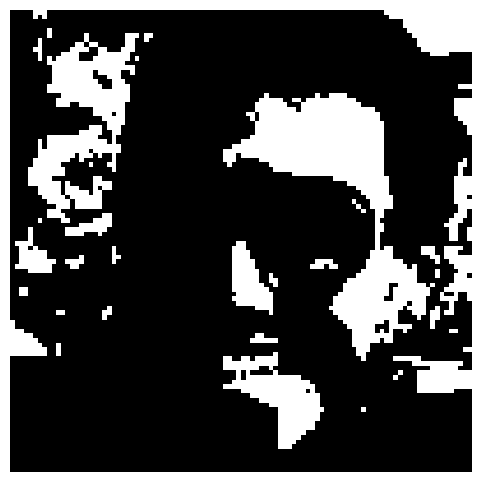

Displaying 00094.png


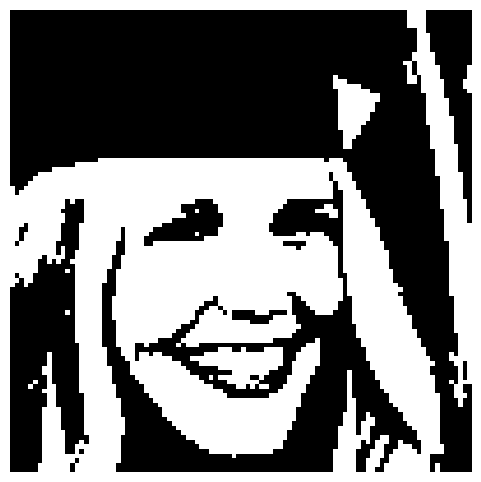

Displaying 00096.png


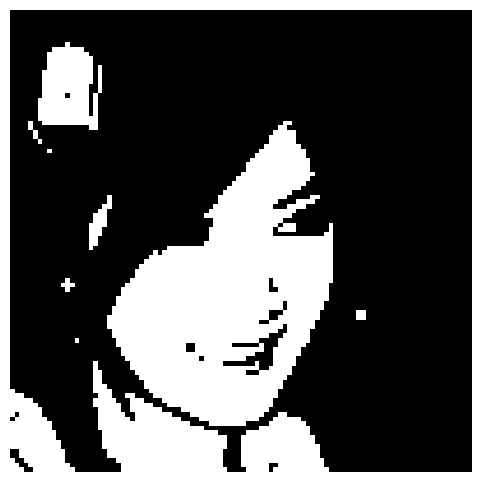

Displaying 00097.png


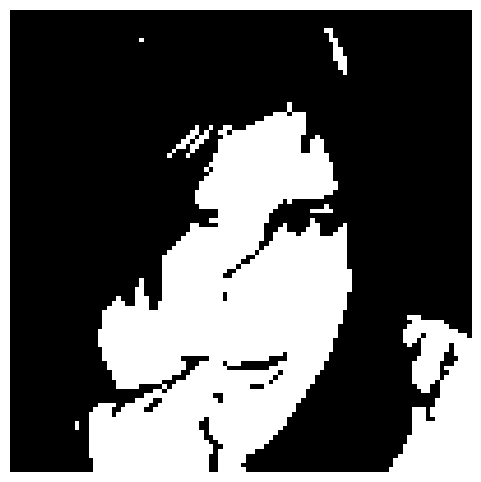

Displaying 00098.png


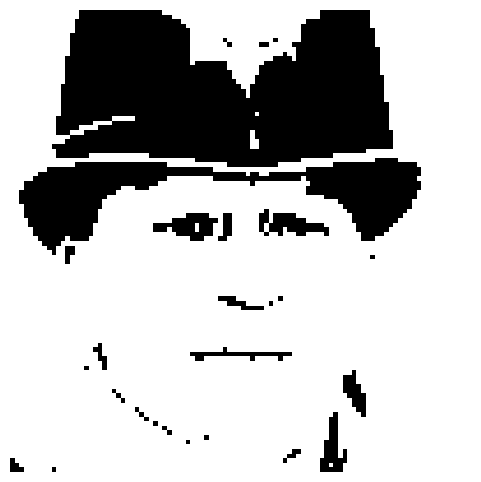

Displaying 00099.png


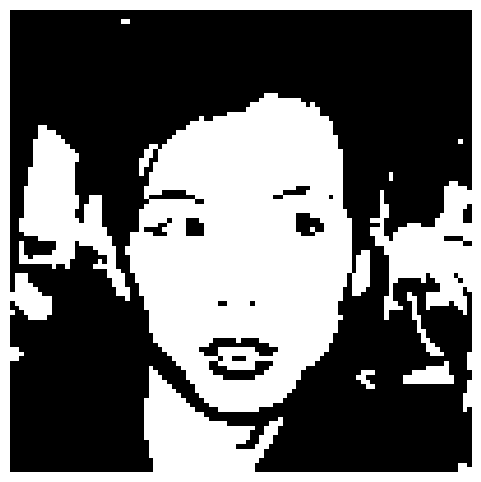

Displaying 00100.png


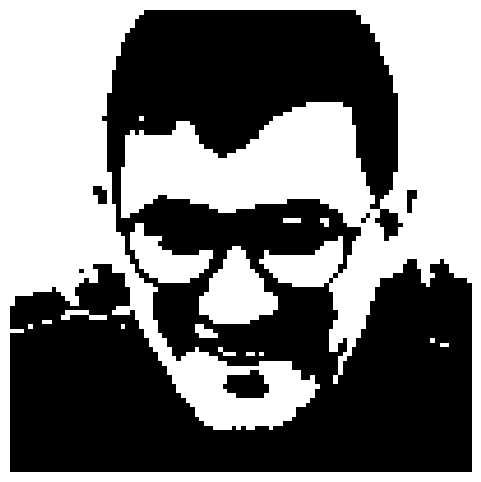

Displaying 00101.png


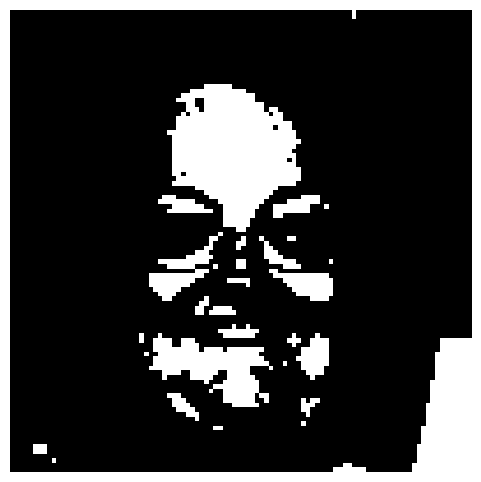

Displaying 00103.png


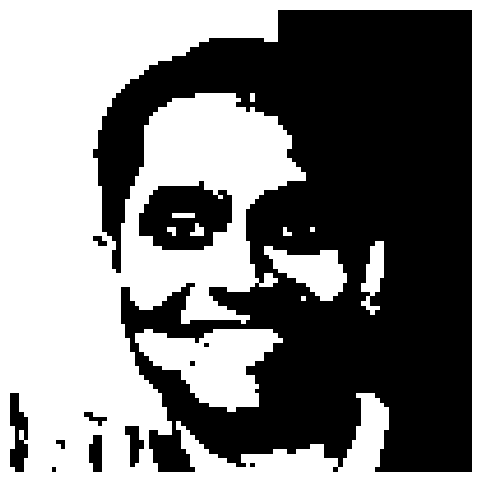

Displaying 00104.png


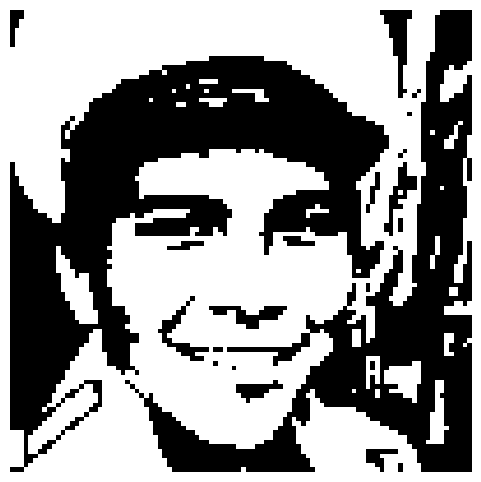

Displaying 00106.png


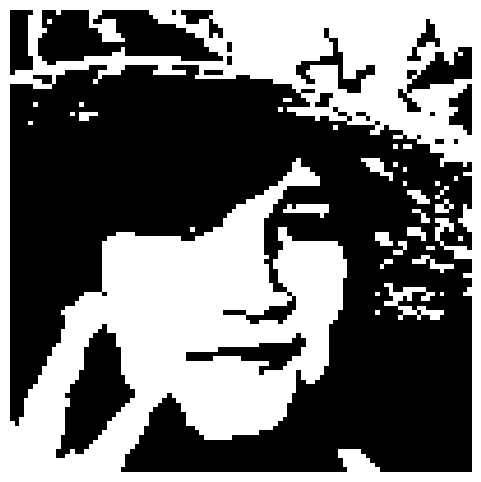

Displaying 00107.png


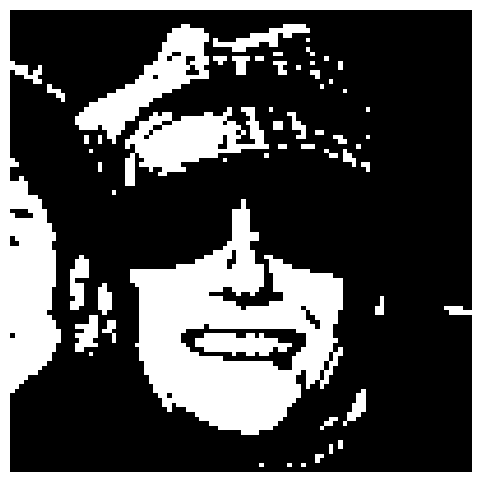

Displaying 00108.png


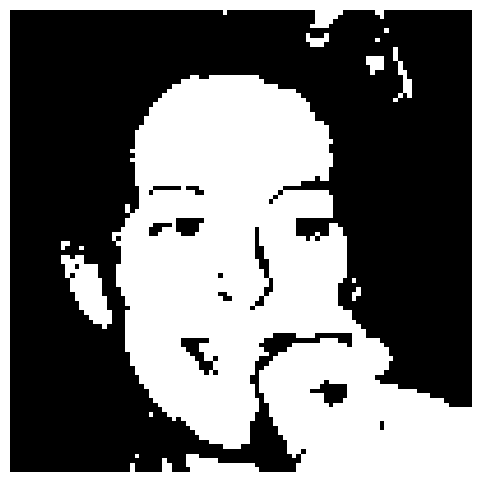

Displaying 00109.png


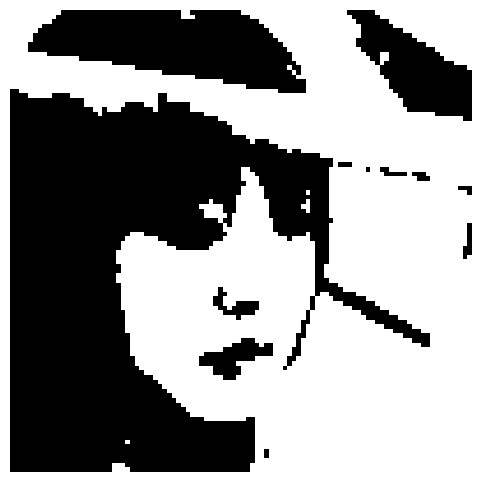

Displaying 00110.png


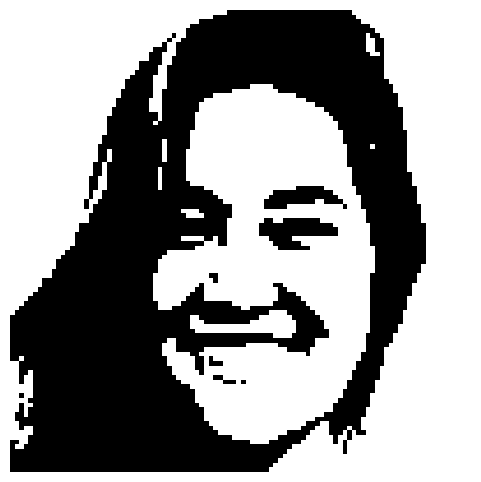

Displaying 00111.png


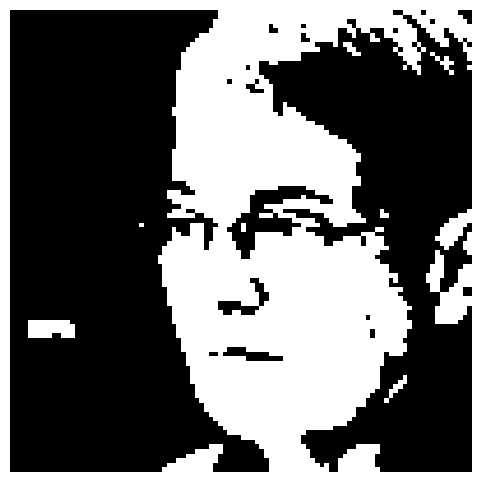

Displaying 00113.png


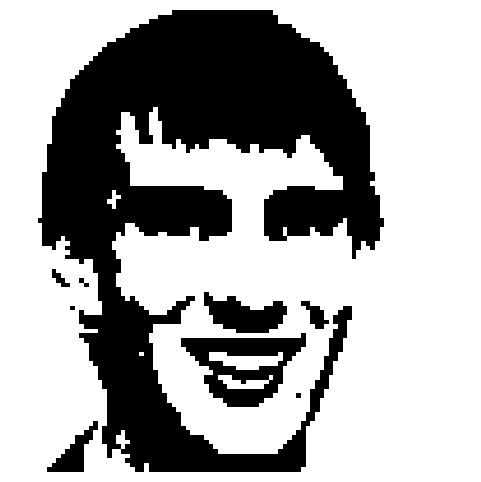

Displaying 00114.png


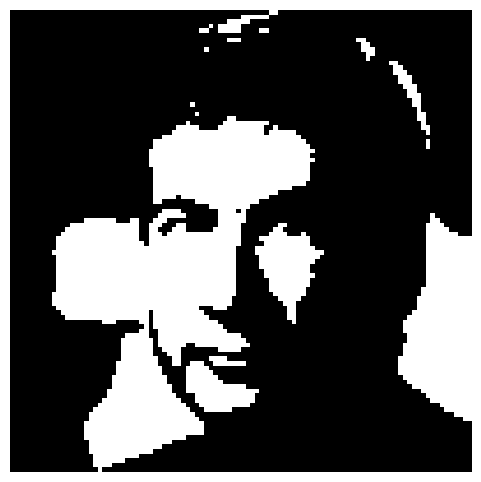

Displaying 00117.png


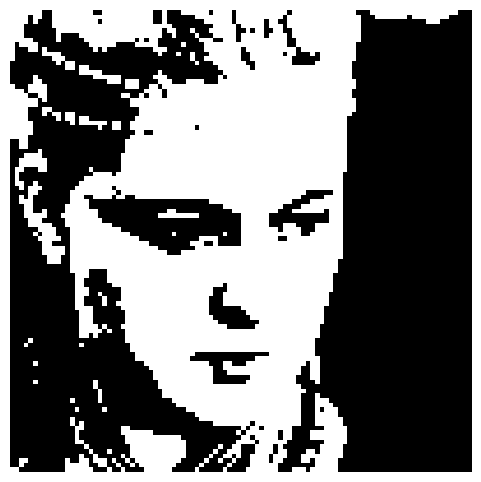

Displaying 00118.png


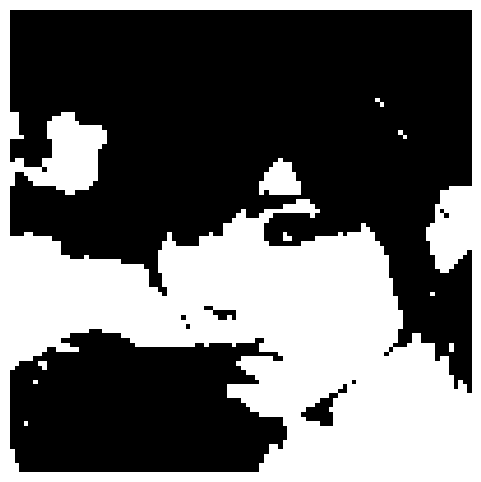

Displaying 00120.png


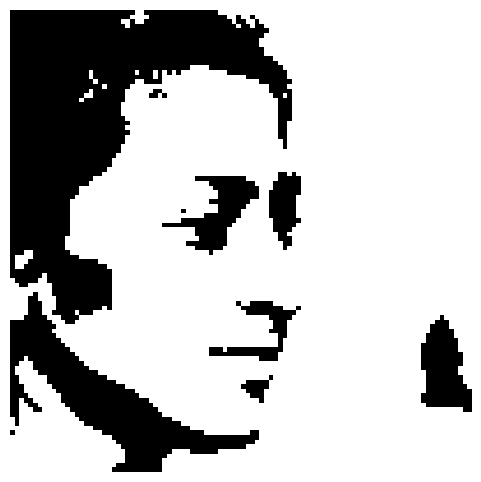

Displaying 00122.png


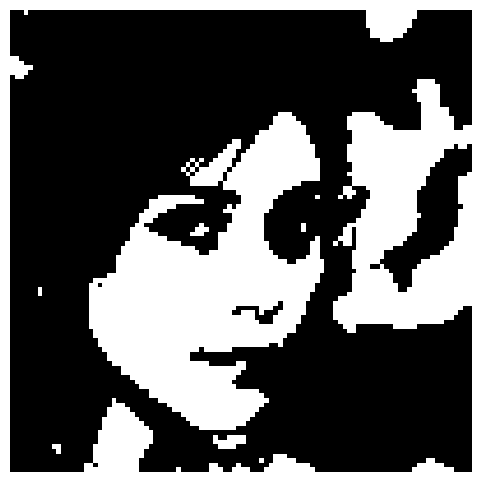

Displaying 00123.png


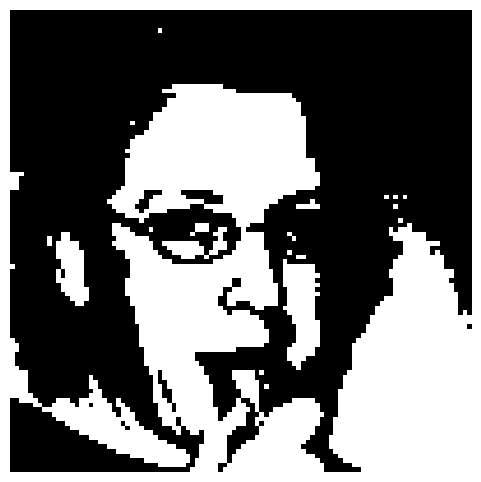

Displaying 00125.png


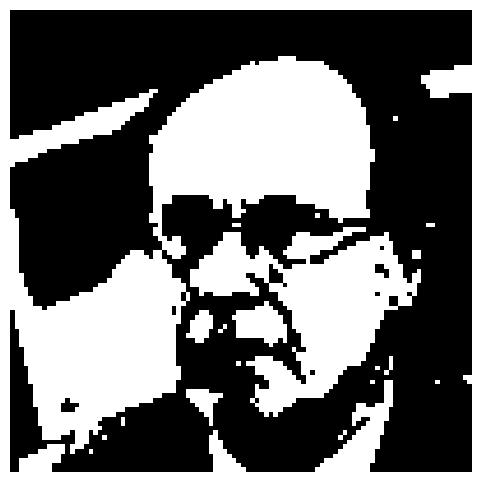

Displaying 00127.png


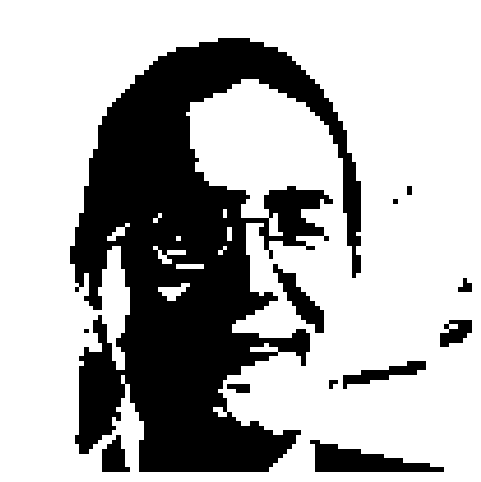

Displaying 00128.png


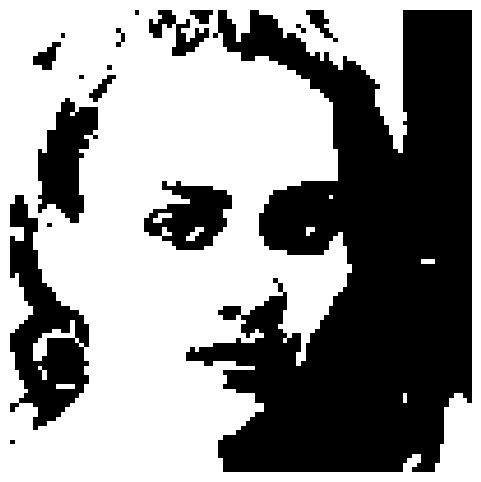

Displaying 00129.png


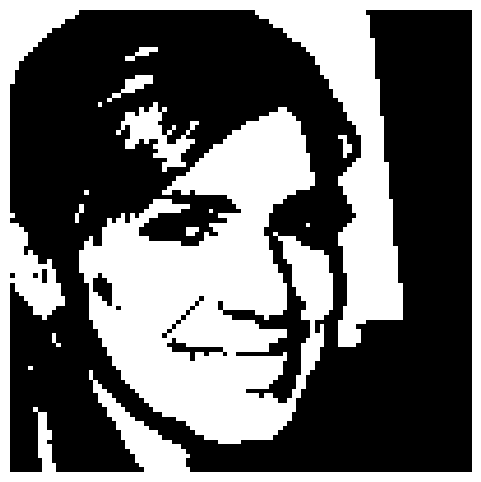

In [45]:
process_images('../data/images', '../data/grids', '../data/grids/csv_list.txt', size=(100, 100), threshold=0.5)
